<a href="https://colab.research.google.com/github/Syzinx/Data-Mining-checkpoint-2/blob/main/Analisis_data_tips_pelayan_restoran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS DATA RATA-RATA TIPS PELAYAN RESTORAN**

#**Import Library**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari analisis data mengenai tips pelayan restoran adalah untuk memperoleh pemahaman yang lebih baik tentang faktor-faktor yang memengaruhi jumlah tips yang diberikan oleh pelanggan kepada pelayan. Dalam industri restoran, tips tidak hanya menjadi sumber pendapatan tambahan bagi pelayan, tetapi juga menunjukkan tingkat kepuasan pelanggan terhadap layanan yang mereka terima. Oleh karena itu, dengan mengetahui faktor-faktor yang memengaruhi jumlah tips yang diberikan oleh pelanggan kepada pelayan.


##**Assess Situation**

Situasi bisnis yang mendasari analisis data ini adalah persaingan ketat di industri restoran, yang menuntut peningkatan kualitas layanan dan inovasi untuk memenangkan pasar.

##**Data Mining Goals**

Tujuan dari data mining ini adalah untuk mengetahui apa saja yang mempengaruhi jumlah tips yang diberikan, seperti kualitas layanan, gender, waktu kunjungan, atau total harga makanan yang dikeluarkan pelanggan. Selain itu, analisis juga dimaksudkan untuk membuat model prediksi yang dapat memperkirakan jumlah tips yang mungkin diberikan oleh pelanggan dalam kondisi tertentu.

##**Project Plan**

Untuk memulai rencana proyek untuk menganalisis data tips pelayan restoran, data transaksi akan dikumpulkan dari sistem Point of Sale (POS) restoran. Setelah itu, data akan disusun dan dipelajari untuk memahami karakteristiknya dan menemukan pola yang menarik terkait jumlah tips yang diberikan pelanggan. Langkah selanjutnya adalah mengeksplorasi data untuk mengetahui bagaimana variabel seperti hari, waktu kunjungan, gender, jenis makanan yang dipesan, total harga yang dibayar pelanggan dan lainnya berhubungan dengan jumlah tips yang diberikan.

#**DATA UNDERSTANDING**




##**Collect Initial Data**

Data tentang analisa tips pada pelayan restoran yang saya dapat dari kaggle (https://www.kaggle.com/datasets/jsphyg/tipping)

In [3]:
df = pd.read_csv('/content/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##**Describe Data**

####Informasi Dasar

In [ ]:
print("Jumlah baris dataset:", df.shape[0])
print("Jumlah kolom dataset:", df.shape[1])

Jumlah baris dataset: 244
Jumlah kolom dataset: 7


####Informasi Lanjutan

In [ ]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


1. total_bill:

  Nama Kolom: total_bill,
  Tipe Data: float64,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menjelaskan total biaya yang harus dibayarkan oleh pelanggan untuk makanan dan minuman yang dipesan.

2. tip:

  Nama Kolom: tip,
  Tipe Data: float64,
  Jumlah Data: 244,
  Penjelasan: Kolom ini berisi jumlah tip yang diberikan oleh pelanggan.

3. sex:

  Nama Kolom: sex,
  Tipe Data: object,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan jenis kelamin pelanggan, biasanya berisi nilai 'Male' atau 'Female'.

4. smoker:

  Nama Kolom: smoker,
  Tipe Data: object,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan apakah pelanggan adalah perokok atau bukan, biasanya berisi nilai 'Yes' atau 'No'.

5. day:

  Nama Kolom: day,
  Tipe Data: object,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan hari ketika transaksi dilakukan, biasanya berisi nilai 'Thur' (Thursday), 'Fri' (Friday), 'Sat' (Saturday), atau 'Sun' (Sunday).

6. time:

  Nama Kolom: time,
  Tipe Data: object,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan waktu makan, biasanya berisi nilai 'Lunch' atau 'Dinner'.

7. size:

  Nama Kolom: size,
  Tipe Data: int64,
  Jumlah Data: 244,
  Penjelasan: Kolom ini menunjukkan jumlah orang dalam kelompok yang makan di restoran.

####Informasi Statistik Deskriptif

In [ ]:
deskripsi_statistik = df.describe()
deskripsi_statistik

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#####1. total bill

- **Count**: Terdapat 244 data pada kolom total_bill.

- **Mean**: Rata-rata total biaya yang harus dibayarkan oleh pelanggan adalah sekitar $19.79.

- **Std**: Standar deviasi dari total biaya adalah sekitar $8.90, menunjukkan sebaran data dari rata-rata.

- **Min**: Biaya terendah yang harus dibayarkan adalah $3.07.

- **25%**: 25% dari data memiliki total biaya kurang dari $13.35.

- **50%**: 50% dari data memiliki total biaya kurang dari $17.80.

- **75%**: 75% dari data memiliki total biaya kurang dari $24.13.

- **Max**: Biaya tertinggi yang harus dibayarkan adalah $50.81.

#####2. tip

- **Count**: Terdapat 244 data pada kolom tip.

- **Mean**: Rata-rata tip yang diberikan oleh pelanggan adalah sekitar $3.00.

- **Std**: Standar deviasi dari tip adalah sekitar $1.38.

- **Min**: Tip terendah yang diberikan adalah $1.00.

- **25%**: 25% dari data memiliki tip kurang dari $2.00.

- **50%**: 50% dari data memiliki tip kurang dari $2.90.

- **75%**: 75% dari data memiliki tip kurang dari $3.56.

- **Max**: Tip tertinggi yang diberikan adalah $10.00.

#####3. Size

- **Count**: Terdapat 244 data pada kolom size.

- **Mean**: Rata-rata jumlah orang dalam kelompok yang makan di restoran adalah sekitar 2.57.

- **Std**: Standar deviasi dari jumlah orang dalam kelompok adalah sekitar 0.95.

- **Min**: Jumlah orang terendah dalam kelompok adalah 1.

- **25%**: 25% dari data memiliki jumlah orang dalam kelompok kurang dari 2.

- **50%**: 50% dari data memiliki jumlah orang dalam kelompok kurang dari 2.

- **75%**: 75% dari data memiliki jumlah orang dalam kelompok kurang dari 3.

- **Max**: Jumlah orang tertinggi dalam
kelompok adalah 6.

##**Exploratory Data Analysis**

####korelasi total bill dan tip

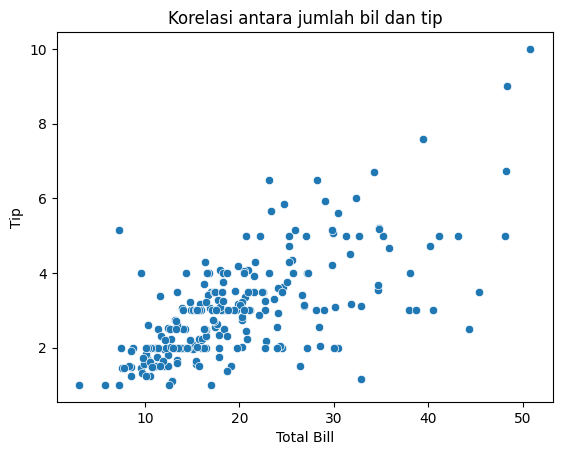

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Korelasi antara jumlah bil dan tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Dari korelasi scatterplot tersebut, kita bisa melihat bahwa ada korelasi positif antara total_bill dan tip, yang berarti bahwa semakin besar total tagihan, semakin besar juga tip yang diberikan. Namun, perlu diingat bahwa korelasi tidak berarti sebab-akibat. Meskipun ada korelasi positif antara total_bill dan tip, kita tidak bisa menyimpulkan bahwa total tagihan yang besar menyebabkan tip yang besar.

####Pengaruh gender terhadap besaran tip

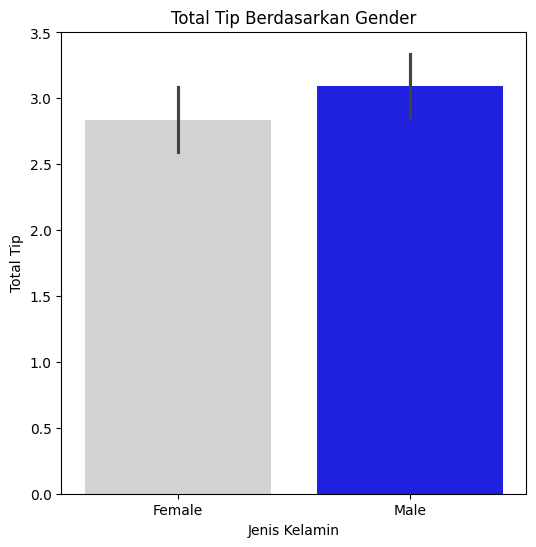

In [4]:
plt.figure(figsize=(6, 6))
sns.barplot(x='sex', y='tip', hue='sex', data=df, palette={'Male': 'blue', 'Female': 'lightgrey'}, legend=False)
plt.title('Total Tip Berdasarkan Gender')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Total Tip')
plt.show()

Hasil visualisasi menunjukkan bahwa rata-rata total tip yang diberikan oleh pelanggan pria cenderung lebih tinggi dibandingkan dengan pelanggan wanita. Dengan melihat Barplot, dapat diamati bahwa bar yang menunjukkan total tip untuk pelanggan pria (berwarna biru) lebih tinggi daripada bar yang mewakili total tip untuk pelanggan wanita (berwarna abu). Ini mengindikasikan bahwa pria cenderung memberikan jumlah tip yang lebih besar dibandingkan wanita, setidaknya dalam sampel data yang dianalisis.

####pengaruh Jumlah Tip Berdasarkan Hari

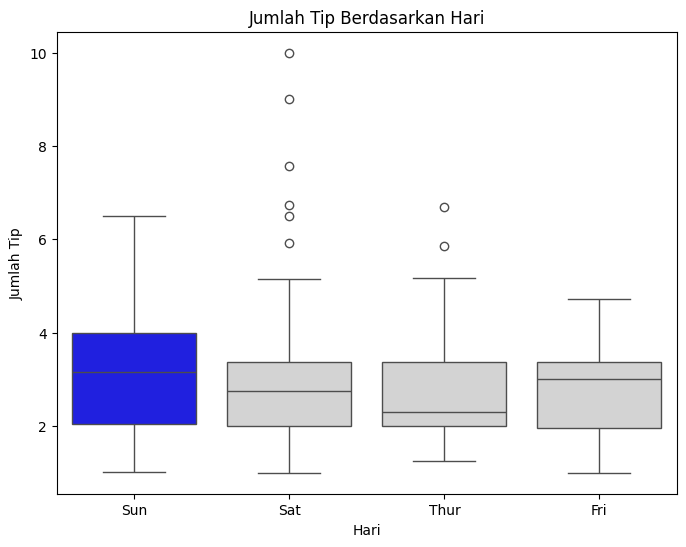

In [ ]:
warna = {'Sun': 'blue', 'Thur': 'lightgrey', 'Fri': 'lightgrey', 'Sat': 'lightgrey'}

plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='tip', data=df, hue='day', palette=warna, legend=False)
plt.title('Jumlah Tip Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Tip')
plt.show()

Dari boxplot diatas, terlihat bahwa secara umum, hari Minggu memiliki jumlah tip yang lebih tinggi dibandingkan dengan hari-hari lainnya. Namun, pada hari Sabtu, terdapat banyak nilai anomali yang lebih tinggi dari rata-rata. Hal ini menunjukkan adanya kecenderungan di mana sebagian pelanggan cenderung memberikan jumlah tip yang lebih besar pada hari Sabtu. Pengaruh hari terhadap jumlah tip bisa jadi terkait dengan aktivitas atau kebiasaan makan di luar yang berbeda pada hari-hari tertentu, seperti akhir pekan atau hari libur.

#### Pengaruh Jumlah Tip Berdasarkan waktu makan (diner/lunch)

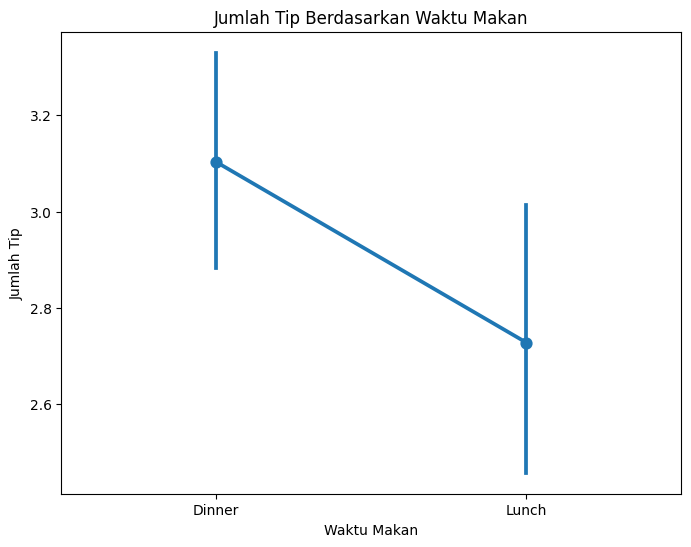

In [ ]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='time', y='tip', data=df)
plt.title('Jumlah Tip Berdasarkan Waktu Makan')
plt.xlabel('Waktu Makan')
plt.ylabel('Jumlah Tip')
plt.show()

Hasil visualisasi dari point plot menunjukkan bahwa rata-rata jumlah tip pada waktu makan malam (Dinner) cenderung lebih tinggi daripada pada waktu makan siang (Lunch). Titik tengah pada garis yang menunjukkan rata-rata jumlah tip pada waktu makan malam (Dinner) berada di atas titik tengah pada waktu makan siang (Lunch), menunjukkan perbedaan yang signifikan dalam jumlah tip antara dua waktu makan tersebut.

##**Verify Data Quality**

####Missing Values

In [ ]:
miss = df.isnull().sum()

print("nilai kosong pada tiap kolom:")
print(miss)

nilai kosong pada tiap kolom:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Dengan menggunakan metode .isnull().sum() pada DataFrame, kita dapat mengecek apakah ada nilai kosong (NaN) pada setiap kolom dalam dataset. Jika hasilnya menunjukkan bahwa jumlah nilai kosong pada setiap kolom adalah 0, maka artinya tidak ada nilai kosong pada kolom tersebut. Dalam konteks ini, hasil dari pengecekan menunjukkan bahwa tidak ada nilai kosong pada tiap kolom dalam dataset. Ini mengindikasikan bahwa dataset tersebut lengkap, tidak ada data yang hilang atau kosong.

####Outliers Values

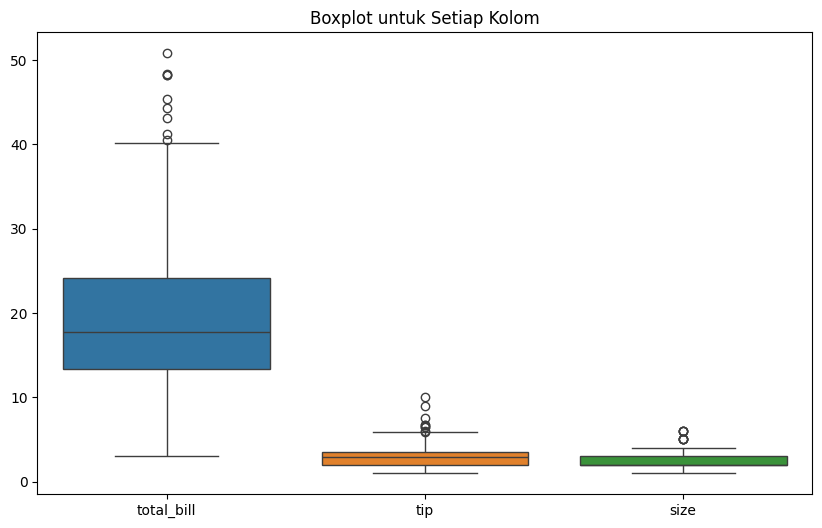

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('outliers pada setiap kolom numerik')
plt.show()


Outliers pada total_bill, tip, dan size yang menunjuk ke atas mengindikasikan bahwa terdapat nilai yang jauh lebih besar dari sebagian besar data dalam kolom-kolom tersebut. Dalam konteks ini, outliers menunjukkan adanya transaksi atau kejadian yang memiliki nilai yang signifikan secara numerik dan mungkin berbeda secara signifikan dari sebagian besar transaksi atau kejadian lainnya.

Misalnya, dalam kolom total_bill, outliers ke atas dapat mengindikasikan adanya transaksi yang sangat besar atau mewakili pembelian atau pemesanan yang tidak biasa. Dalam kolom tip, outliers ke atas dapat mengindikasikan bahwa ada pelanggan yang memberikan tip dalam jumlah yang sangat besar Sementara dalam kolom size, outliers ke atas mungkin mengindikasikan bahwa ada kelompok besar yang makan bersama di restoran, yang dapat berdampak pada volume penjualan atau tingkat keramaian restoran.

####Duplicated Values

In [ ]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2



Dari hasil pengecekan, ditemukan bahwa terdapat duplikat pada baris data diatas, Ini menunjukkan bahwa terdapat satu baris data yang memiliki nilai yang sama persis dengan baris lain dalam dataset. Dalam konteks ini, baris data ini diidentifikasi sebagai duplikat karena memiliki nilai yang identik dengan baris lainnya